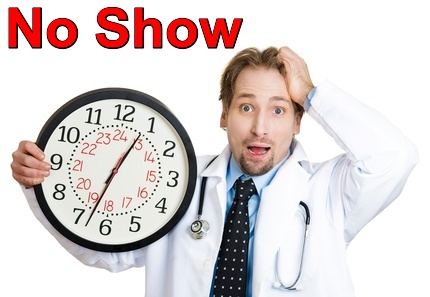



# Project: Investigate NO SHOW Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment.

### Question to Answer :
 - What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

### Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### number of rows and columns

In [3]:
print(f"number of rows are {df.shape[0]} while number of columns are {df.shape[1]}")

number of rows are 110527 while number of columns are 14


### info for the dataframe 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


##### findings : 

there is no missing values

### get a describe of our Dataframe

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


##### findings :

the average age is 37 years old

the minimum age has a typo (-1) which is incorrect

the maximum age is 115 age




### Data Cleaning 

### convert columns to lower case

In [6]:
df.rename(columns=lambda x: x.lower(),inplace=True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### rename no-show to be no_show

In [7]:
df.rename({"no-show":"no_show"},axis=1,inplace=True)

### remove un-nessesary columns

In [8]:
df.drop(["patientid","appointmentid","scheduledday","appointmentday"],axis=1,inplace=True)

### the Dataframe columns after modifications

In [9]:
df.head()

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

### Insights of our DataFrame

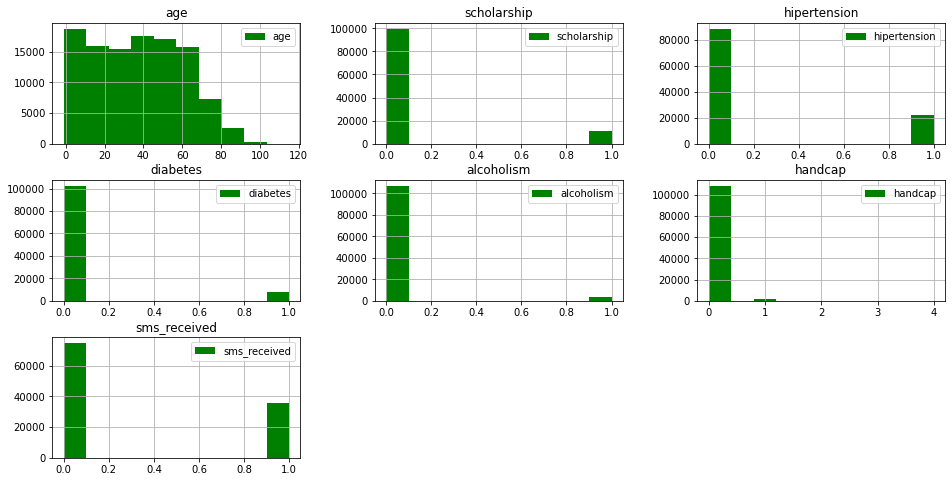

In [10]:
df.hist(figsize=(16,8),color=["green"],legend=True);

##### Findings :
- the most patients who book an appointment are babies - which mean their parents take care of them
while the older people who are  80 years and above usually con't care about booking a appointment.

- almost patients havn't a Bolsa Família program subscription.

- almost patients don't have a (diabetes - alcoholism - handcap) while a small percentage of them 20% have a hipertension.
- almost 70% of patients don't recieve sms messages.

### Analysing Show Vs No Show 

### adding show & noshow allias

In [11]:
show = df.no_show == "No"
noshow = df.no_show == "Yes"

### number of patients that show

In [12]:
df[show].count()

gender           88208
age              88208
neighbourhood    88208
scholarship      88208
hipertension     88208
diabetes         88208
alcoholism       88208
handcap          88208
sms_received     88208
no_show          88208
dtype: int64

##### Findings:
there are 88208 patients that already show

### number of patiens that did't show

In [13]:
df[noshow].count()

gender           22319
age              22319
neighbourhood    22319
scholarship      22319
hipertension     22319
diabetes         22319
alcoholism       22319
handcap          22319
sms_received     22319
no_show          22319
dtype: int64

##### findings :
there are 22319 patients that didn't show

**the percentage of patients who show are 79%**

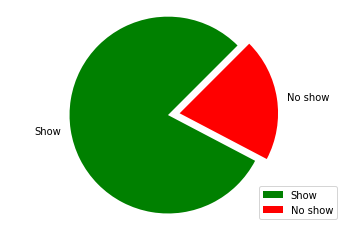

In [14]:

plt.pie(df["no_show"].value_counts(),labels=("Show","No show"),explode= (.12,0),startangle=45,colors =("green","red"))
plt.axis('equal')
plt.legend();

#### Create a function to help us to create comparison plots easily

In [34]:
def compare(ctype = None,ctitle = None,cxlabel = None, cylabel = None ) :
    plt.figure(figsize=(18,6))
    df[ctype].value_counts().plot.bar(label="show",color = ["green"],alpha = .5,)
    df[ctype][noshow].value_counts().plot.bar(label="no show",color = ["red"],alpha = .7,)
    plt.title(ctitle)
    plt.xlabel(cxlabel)
    plt.ylabel(cylabel)
    plt.legend();
    

### analysing show vs no_show via gender

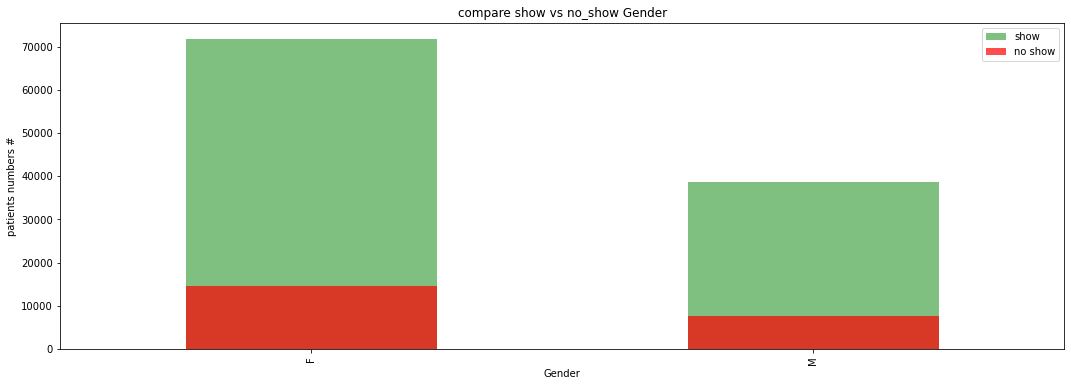

In [35]:
compare (ctype = "gender",ctitle = "compare show vs no_show Gender",cxlabel = "Gender", cylabel = "patients numbers #" )

###### finding :
- Female patients are more than males
- percentage of show patients of both males and females are more than the patients who didn't show

### analysing show vs no_show via scholarship

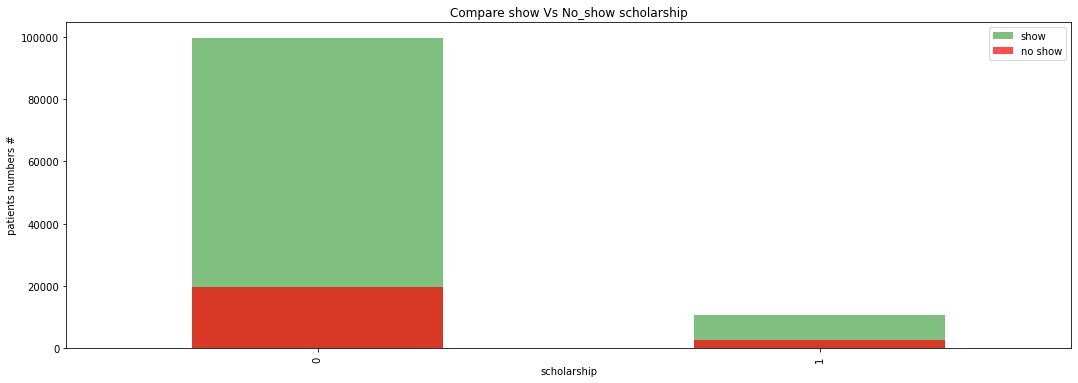

In [36]:
compare(ctype="scholarship",ctitle="Compare show Vs No_show scholarship",cxlabel="scholarship",cylabel=" patients numbers #")

##### Findings :
- most patients haven't a sholarship
- the percentage of show patients for both patients who have / haven't scholarship are more than the no_show patients

### analysing show vs no_show via hipertension

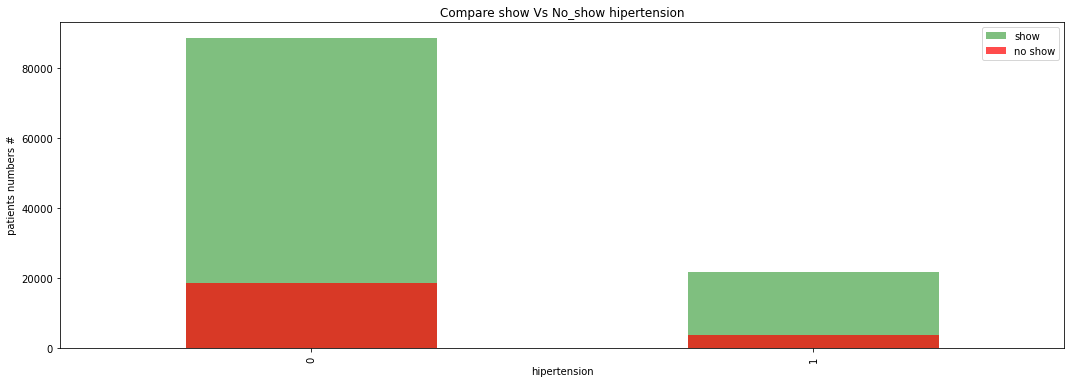

In [37]:
compare(ctype="hipertension",ctitle="Compare show Vs No_show hipertension",cxlabel="hipertension",cylabel=" patients numbers #")


##### Findings :
- most patients haven't a hipertension
- the percentage of show patients for both patients who have / haven't hipertension are more than the no_show patients

### analysing show vs no_show via diabetes

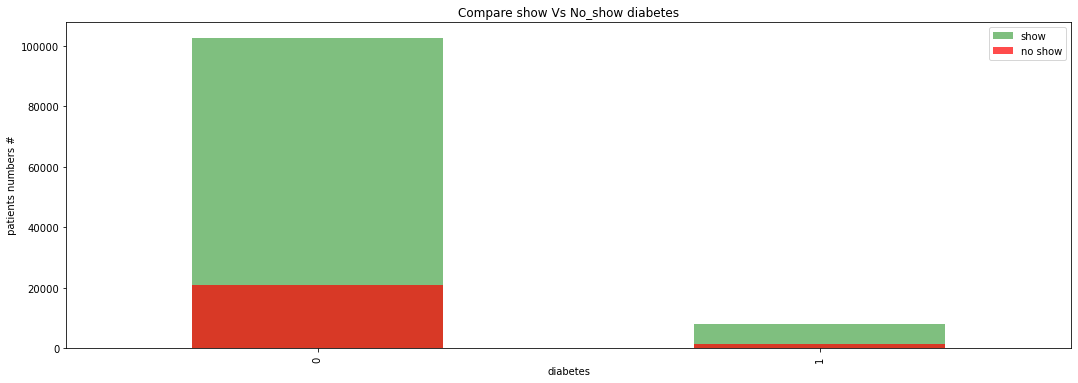

In [38]:
compare(ctype="diabetes",ctitle="Compare show Vs No_show diabetes",cxlabel="diabetes",cylabel=" patients numbers #")


##### Findings :
- most patients haven't a diabetes
- the percentage of show patients for both patients who have / haven't diabetes are more than the no_show patients

### analysing show vs no_show via alcoholism 

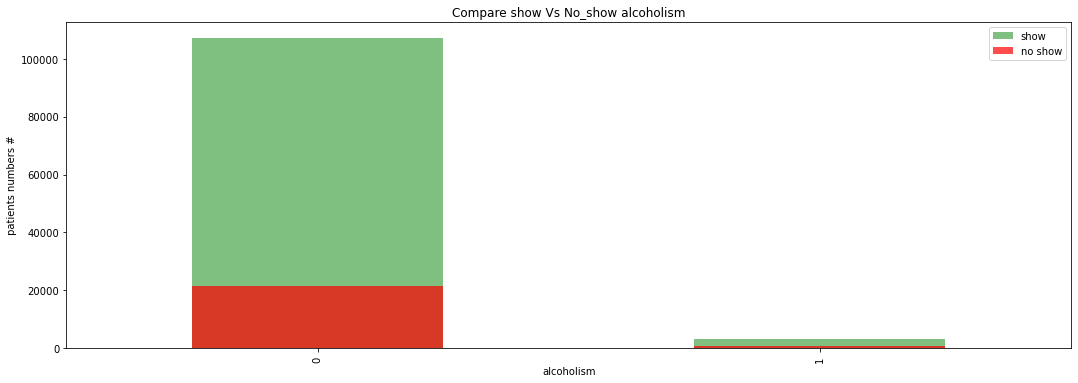

In [39]:
compare(ctype="alcoholism",ctitle="Compare show Vs No_show alcoholism",cxlabel="alcoholism",cylabel=" patients numbers #")


##### Findings :
- most patients haven't a alcoholism
- the percentage of show patients for both patients who have / haven't alcoholism are more than the no_show patients

### analysing show vs no_show via handcap 

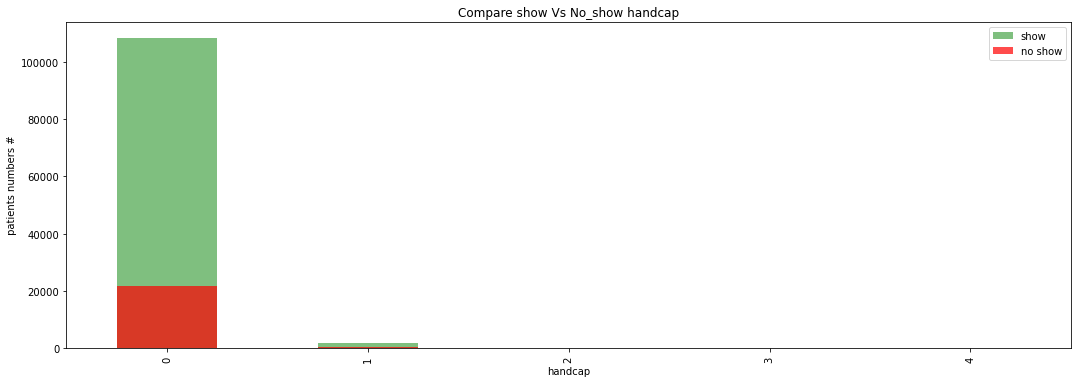

In [40]:
compare(ctype="handcap",ctitle="Compare show Vs No_show handcap",cxlabel="handcap",cylabel=" patients numbers #")


##### Findings :
- most patients haven't a handcap
- the percentage of show patients for both patients who have / haven't handcap are more than the no_show patients

### analysing show vs no_show via sms_received 

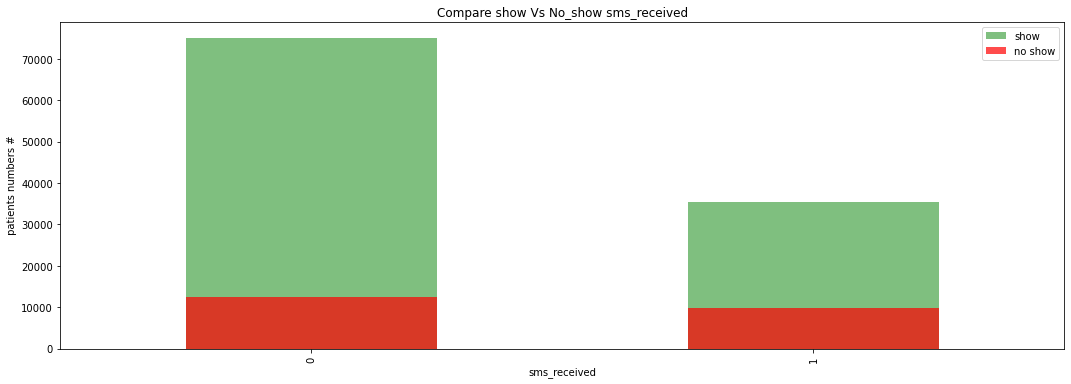

In [41]:
compare(ctype="sms_received",ctitle="Compare show Vs No_show sms_received",cxlabel="sms_received",cylabel=" patients numbers #")


##### Findings :
- something strange here : number of show patients who didn't recieve sms are more than who did recieve sms !

### analysing show vs no_show via age

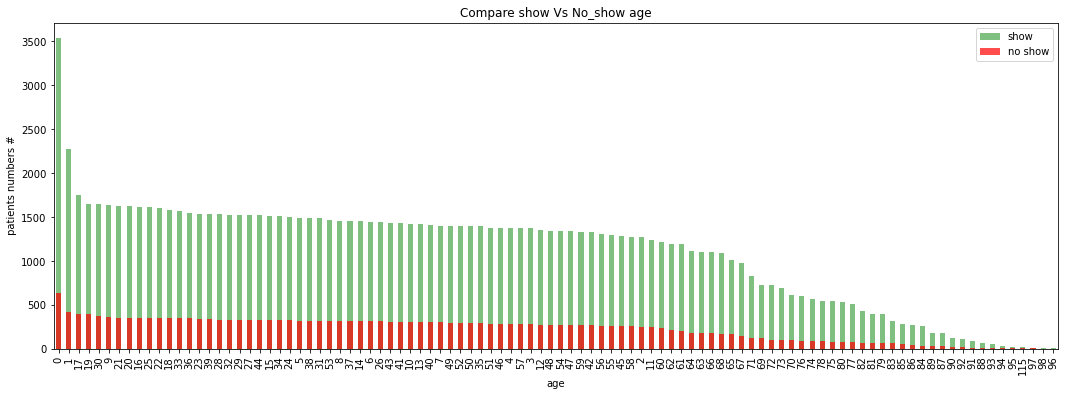

In [42]:
compare(ctype="age",ctitle="Compare show Vs No_show age",cxlabel="age",cylabel=" patients numbers #")


##### Findings :
- the babies patients never miss any appointments - they parents take care of them well
- the kids and the babies are the most patients who show for the appointments
- the second most patient group who attent appointments are ages from 35 to 70 years old
- the age group from 80 to 115 are the less group who attend appointments

### analysing top location neighbourhood where most patients show

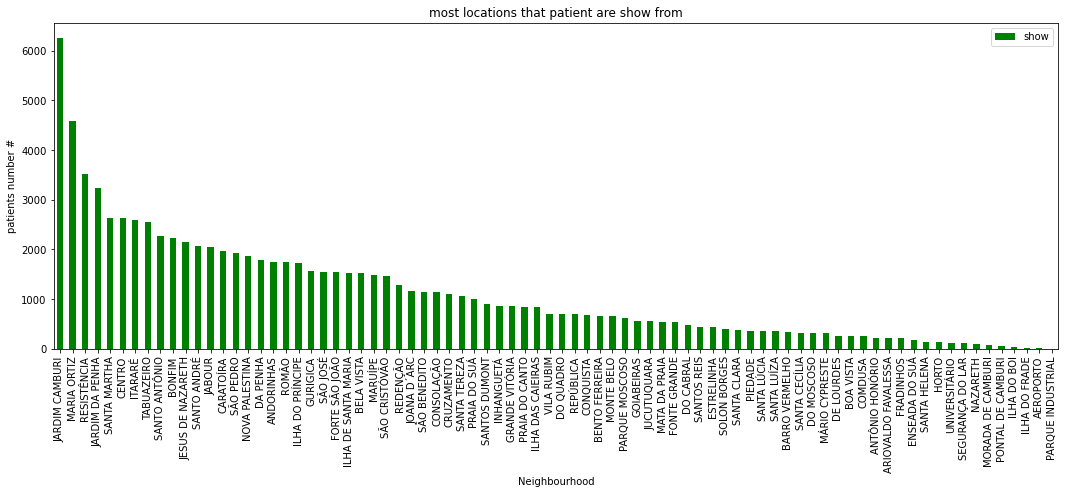

In [53]:
plt.figure(figsize=(18,6))
df["neighbourhood"][show].value_counts().plot.bar(label="show",color = ["green"])
plt.title("most locations that patient are show from")
plt.xlabel("Neighbourhood")
plt.ylabel("patients number #")
plt.legend();


##### findings :
there are a strong relationship between the neighbourhood and the show patients

________________


<a id='conclusions'></a>
## Conclusions

- there are a strong relationship between the neighbourhood and the show patient
- the babies patients never miss any appointments - they parents take care of them well
- the kids and the babies are the most patients who show for the appointments
- the second most patient group who attent appointments are ages from 35 to 70 years old
- the age group from 80 to 115 are the less group who attend appointments
- something strange here : number of show patients who didn't recieve sms are more than who did recieve sms !

**limitations** couldn't find a corelation between (show/ not show) with other charactriestics such as handcap, diabetes .. etc 
